# Stima $R_t$

**TEST PLOTLY**

La stima di $R_t$ è effettuata mediante il modello semplificato **RKI**

https://covid19.infn.it/sommario/rt-info.html

In [1]:
import matplotlib.pyplot as plt

from aidam.math_utils import moving_function_rev1
#from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, auto_grid_shape
#import pickle as pkl
import numpy as np
from covid_lib import read_covid_data, find_day_index


import plotly
import plotly.graph_objs as go

## Lettura dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 920
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2022-08-31T17:00:00


## Costanti e parametri

In [3]:
end_day=len(giorni)-1
start_day=end_day-120


regione='Toscana'

print('Rt sarà stimato per %s dal %s al %s'%(regione,giorni[start_day][0:10],giorni[end_day][0:10]))

Rt sarà stimato per Toscana dal 2022-05-03 al 2022-08-31


## Calcolo modello KRI

In [4]:
numero_giorni=end_day-start_day

kdays=4

# estendo le regioni con l'Italia
regioni_plus=list(regioni)
regioni_plus.append('Italia')
regioni_plus=np.asarray(regioni_plus)

In [5]:
rt={}
for regione in regioni_plus:
    rt[regione]=np.zeros(numero_giorni)
    for i,day in enumerate(range(start_day,end_day)):
        temp1=trend['totale_positivi'][regione][day-kdays:day]
        temp2=trend['totale_positivi'][regione][day-2*kdays:day-kdays]
        rt[regione][i]=np.sum(temp1)/np.sum(temp2)    

### Plot in grid di tutte le regioni

In [6]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

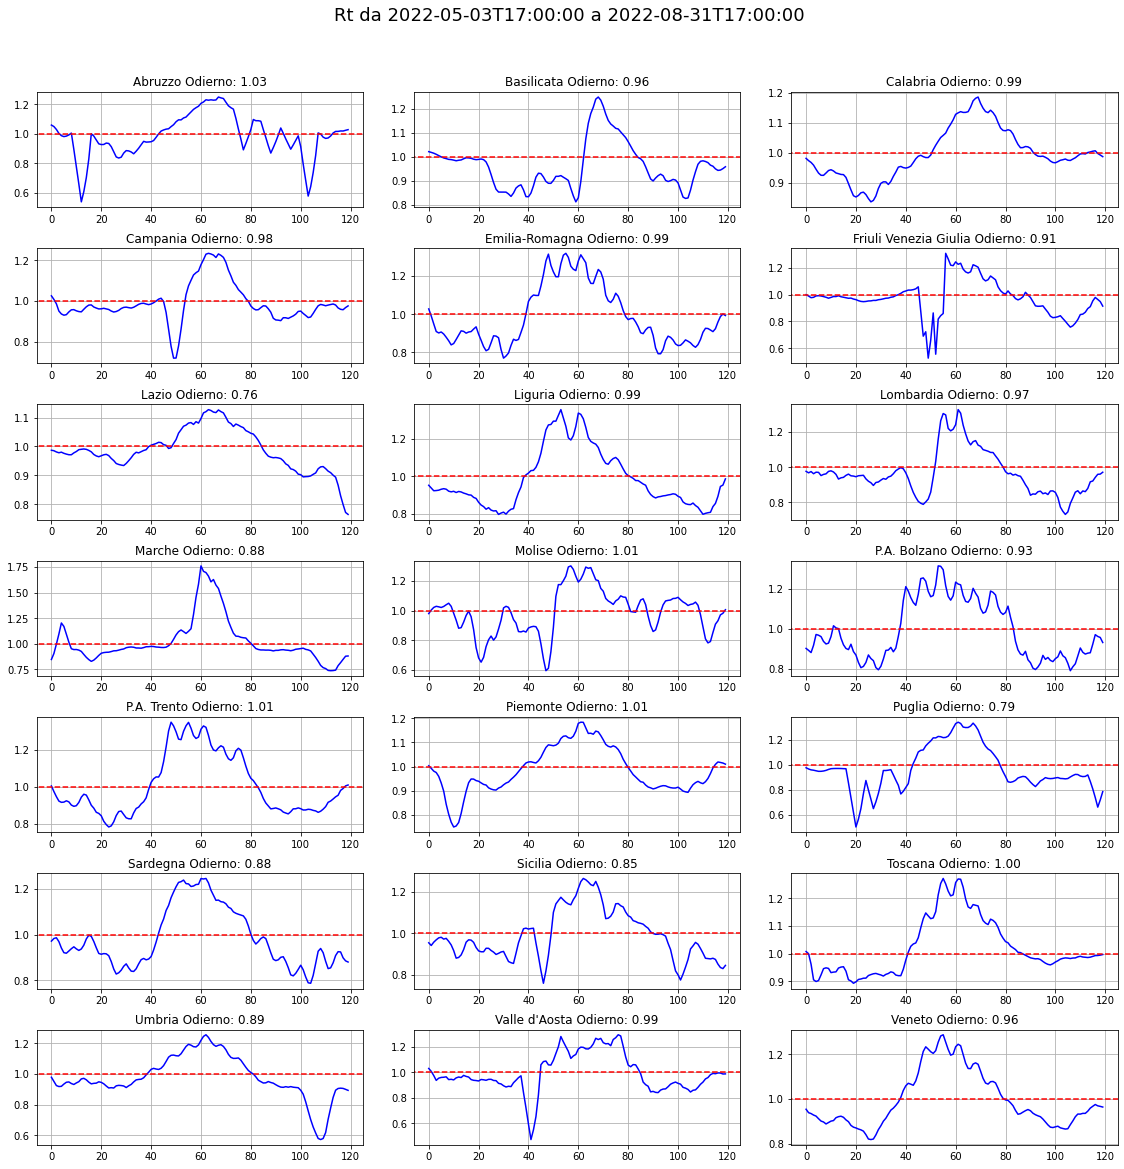

In [7]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('Rt da %s a %s'%(giorni[start_day],giorni[end_day]), y=1.02,fontsize=18)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(rt[regione],'b-',linewidth=1.5)
    ax[grid_seq[i]].set_title(regione+' Odierno: %.2f'%rt[regione][-1])
    ax[grid_seq[i]].axhline(1,-0.5,numero_giorni,c='r', ls='--')
    #ax[grid_seq[i]].legend()
    ax[grid_seq[i]].grid()

### Plot regioni specifiche

In [8]:
fig=go.Figure()
for r in regioni_plus:
    fig.add_trace(go.Scatter(x=giorni[-len(rt[r]):],
                            y=rt[r],
                            name=r,
                            mode='lines+markers'))

fig.update_layout(
    title='Valore Rt (metodo RKI)',
    height=600,
    width=900)
fig.show()
    

In [9]:
giorni[-10:]

array(['2022-08-22T17:00:00', '2022-08-23T17:00:00',
       '2022-08-24T17:00:00', '2022-08-25T17:00:00',
       '2022-08-26T17:00:00', '2022-08-27T17:00:00',
       '2022-08-28T17:00:00', '2022-08-29T17:00:00',
       '2022-08-30T17:00:00', '2022-08-31T17:00:00'], dtype=object)

## Bar charts fra regioni

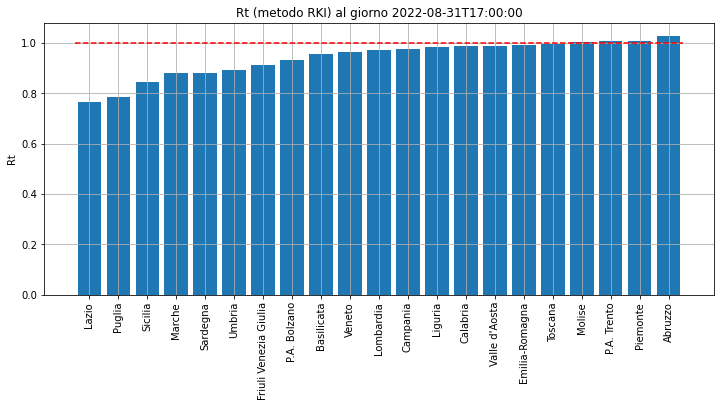

In [10]:
valori=np.array([rt[r][-1] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Rt (metodo RKI) al giorno %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.hlines(1,-0.5,20.5,colors='r', linestyles='--')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Rt')
plt.grid()
plt.show()


## Heatmap

In [11]:
import seaborn as sns
import pandas as pd

In [12]:
rt_df=pd.DataFrame(rt)
rt_df['Data']=giorni[-120:]
rt_df

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia,Data
0,1.059700,1.020988,0.981629,1.025176,1.027026,1.000371,0.986802,0.951543,0.976296,0.845327,...,1.003203,0.976450,0.971188,0.954976,1.007160,0.978517,1.029930,0.954634,0.990367,2022-05-04T17:00:00
1,1.049676,1.018016,0.973999,1.007519,0.990143,0.989847,0.985216,0.936920,0.967706,0.903546,...,0.992490,0.966519,0.982620,0.942000,0.999339,0.951214,1.007284,0.939299,0.979969,2022-05-05T17:00:00
2,1.030036,1.014585,0.967973,0.985974,0.948891,0.977649,0.980962,0.922359,0.974990,0.995574,...,0.981016,0.959558,0.985880,0.957749,0.961478,0.923992,0.974483,0.935401,0.972545,2022-05-06T17:00:00
3,1.003433,1.009965,0.958988,0.950402,0.908936,0.980352,0.978107,0.923318,0.962761,1.093871,...,0.975134,0.956738,0.969067,0.969148,0.904858,0.917691,0.936443,0.928759,0.959710,2022-05-07T17:00:00
4,0.987948,1.004511,0.945189,0.936115,0.901367,0.990604,0.980191,0.925200,0.971434,1.202435,...,0.959318,0.952223,0.941084,0.978729,0.898590,0.919020,0.953670,0.924143,0.956296,2022-05-08T17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.016809,0.949356,1.005452,0.965715,0.923582,0.953436,0.865960,0.854424,0.921256,0.784963,...,1.008904,0.807427,0.925004,0.874877,0.989689,0.905010,0.988660,0.967860,0.930614,2022-08-27T17:00:00
116,1.019878,0.942890,1.006939,0.958926,0.958203,0.979425,0.829217,0.892252,0.941859,0.814644,...,1.018780,0.738457,0.923918,0.852328,0.992500,0.907035,0.994887,0.975697,0.923623,2022-08-28T17:00:00
117,1.019457,0.944201,0.997955,0.956965,0.987211,0.964328,0.798829,0.945421,0.959399,0.846638,...,1.016805,0.662009,0.898138,0.835847,0.992905,0.905420,0.994005,0.969861,0.915249,2022-08-29T17:00:00
118,1.024289,0.950277,0.992747,0.967481,1.000261,0.948490,0.771351,0.952448,0.960504,0.877417,...,1.014396,0.719380,0.884926,0.830626,0.994192,0.899279,0.986495,0.967351,0.915993,2022-08-30T17:00:00


In [13]:
fig = go.Figure(data=go.Heatmap(z=rt_df.T.values,
y=rt_df.columns,x=rt_df['Data'],colorscale = 'Rainbow'))


fig.update_layout(width=1200,height=800)
fig.show()

## Tendenza

Differenza in $R_t$ negli ultimi giorni per le varie regioni

In [14]:
giorni_tendenza=14

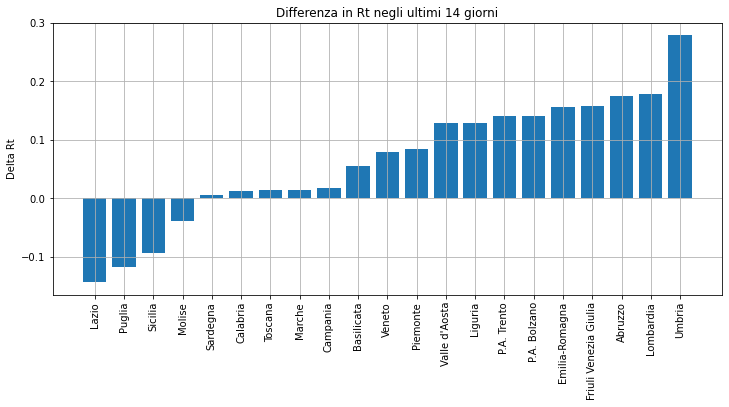

In [15]:
tendenza=np.array([rt[r][-1]-rt[r][-giorni_tendenza] for r in regioni])
ordine=np.argsort(tendenza)

plt.figure(figsize=(12,5))
plt.title('Differenza in Rt negli ultimi %d giorni'%giorni_tendenza)
plt.bar(range(len(regioni)),tendenza[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Delta Rt')
plt.grid()
plt.show()

#### Salvataggio Rt su file esterno 

In [16]:
import pandas as pd

In [17]:
rt_df=pd.DataFrame(rt,index=[x[0:10] for x in giorni[start_day:end_day]])
rt_df.to_excel('rt_regioni.xls')

c:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



In [18]:
rt_df.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia
2022-08-26,1.016809,0.949356,1.005452,0.965715,0.923582,0.953436,0.865960,0.854424,0.921256,0.784963,...,0.954198,1.008904,0.807427,0.925004,0.874877,0.989689,0.905010,0.988660,0.967860,0.930614
2022-08-27,1.019878,0.942890,1.006939,0.958926,0.958203,0.979425,0.829217,0.892252,0.941859,0.814644,...,0.980451,1.018780,0.738457,0.923918,0.852328,0.992500,0.907035,0.994887,0.975697,0.923623
2022-08-28,1.019457,0.944201,0.997955,0.956965,0.987211,0.964328,0.798829,0.945421,0.959399,0.846638,...,0.990762,1.016805,0.662009,0.898138,0.835847,0.992905,0.905420,0.994005,0.969861,0.915249
2022-08-29,1.024289,0.950277,0.992747,0.967481,1.000261,0.948490,0.771351,0.952448,0.960504,0.877417,...,1.004977,1.014396,0.719380,0.884926,0.830626,0.994192,0.899279,0.986495,0.967351,0.915993
2022-08-30,1.028628,0.958048,0.987311,0.975674,0.992547,0.914534,0.764519,0.985772,0.971222,0.879512,...,1.009679,1.009776,0.785694,0.879800,0.845957,0.996350,0.892704,0.987323,0.964454,0.922510
